<a href="https://colab.research.google.com/github/jaison-1920/pytorch_practice/blob/main/pytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Neural Network

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

This Notebook is to:
* Import Iris Dataset
* Setup a neural network using pytorch
* predict the model

In [27]:
#Create a model class which inherits the nn.module
class Model(nn.Module):
  # Input layer = 4-->
  # Hidden layer (H1)8-->
  # Hidden layer (H2)9-->
  # Output layer: 3
  def __init__(self,in_features=4,h1=8,h2=9,output=3):
    super().__init__() #instance for nn.Module
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,output)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [28]:
#pick a manual seed for randomization
torch.manual_seed(41)
# call the Model class
model = Model()

# Load the data and train the model

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
iris_df = pd.read_csv(url)
iris_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [31]:
iris_df['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [32]:
iris_df['variety'] =  iris_df['variety'].replace('Setosa',0.0)
iris_df['variety'] =  iris_df['variety'].replace('Versicolor',1.0)
iris_df['variety'] =  iris_df['variety'].replace('Virginica',2.0)

In [33]:
iris_df['variety'].value_counts()

0.0    50
1.0    50
2.0    50
Name: variety, dtype: int64

In [34]:
#splitting feature and target
X = iris_df.drop('variety',axis=1)
y = iris_df['variety']

In [35]:
#converting X to numpy array
X = X.values
y = y.values

In [36]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [38]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [39]:
#converting X features to Float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [40]:
X_train

tensor([[5.7000, 2.6000, 3.5000, 1.0000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [5.2000, 3.5000, 1.5000, 0

In [41]:
X_test

tensor([[6.0000, 2.2000, 5.0000, 1.5000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [4.7000, 3.2000, 1.3000, 0

In [42]:
# converting y features to long tensors because y fetures are integers
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [43]:
y_train

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])

In [44]:
# set the criterion to measure the error
criterion = nn.CrossEntropyLoss()
# set the optimizer,set the learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


In [45]:
for param in model.parameters():
  print(type(param),param.size())

<class 'torch.nn.parameter.Parameter'> torch.Size([8, 4])
<class 'torch.nn.parameter.Parameter'> torch.Size([8])
<class 'torch.nn.parameter.Parameter'> torch.Size([9, 8])
<class 'torch.nn.parameter.Parameter'> torch.Size([9])
<class 'torch.nn.parameter.Parameter'> torch.Size([3, 9])
<class 'torch.nn.parameter.Parameter'> torch.Size([3])


In [46]:
# train the model
epochs = 100
losses = []
for i in range(epochs):
  # Go forward to get a prediction
  y_pred = model.forward(X_train) # get predicted result

  # measure the loss
  loss = criterion(y_pred,y_train)

  #keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i%10 == 0:
    print(f'Epoch:{i}, loss:{loss}')

  #Do backpropagation to improve results
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch:0, loss:1.125203251838684
Epoch:10, loss:1.0097211599349976
Epoch:20, loss:0.8162347674369812
Epoch:30, loss:0.585993230342865
Epoch:40, loss:0.4003389775753021
Epoch:50, loss:0.26794716715812683
Epoch:60, loss:0.1796349585056305
Epoch:70, loss:0.12165623158216476
Epoch:80, loss:0.0860651507973671
Epoch:90, loss:0.06522614508867264


Text(0, 0.5, 'loss')

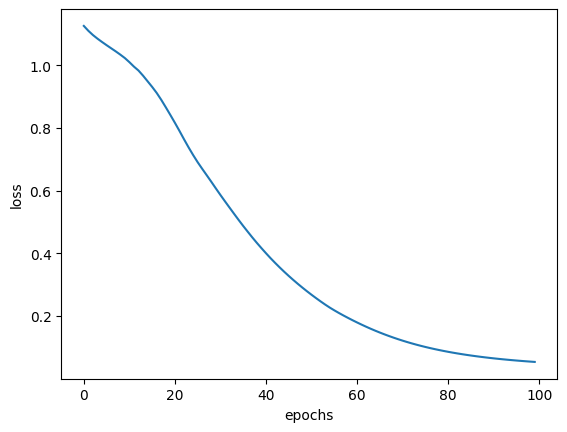

In [47]:
#graph it out
plt.plot(range(epochs),losses)
plt.xlabel('epochs')
plt.ylabel('loss')

# Evaluate the model with testing data

In [48]:
with torch.no_grad(): # stops the backpropagation bcz we dont need that for testing the test data
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test) # evaluate the loss between predicted and test data



In [49]:
loss

tensor(0.1315)

In [63]:
# how the test data worked

correct = 0
with torch.no_grad(): # stopping the backpropagation
  for i,data in enumerate(X_test):
    y_val = model.forward(data) # forward passing the data and getting
                                # each value in y_val


    # if statement to identify the species from predictions
    if y_val.argmax().item()==0:
      species = 'Setosa'
    elif y_val.argmax().item()==1:
      species = 'versi color'
    else:
      species = 'virginica'


    # if statement to identify the species from testing data
    if y_test[i] == 0:
      x = 'setosa'
    elif y_test[i] ==1:
      x = 'versicolor'
    else:
      x = 'virginica'

    # this will tell us which flower class, the network think it is
    print(f'{i+1}-->{(str(y_val))} original:{y_test[i]} ({x}) prediction:{y_val.argmax().item()} ({species})')

    if y_val.argmax().item() == y_test[i]: # code to take the number of
      correct +=1                          # correct output
  print(f'we got {correct} correct predictions out of {i+1} test values')

1-->tensor([-5.8771,  4.4629,  6.5155]) original:2 (virginica)  prediction:2 (virginica)
2-->tensor([-7.5451,  4.1668,  9.7293]) original:2 (virginica)  prediction:2 (virginica)
3-->tensor([-8.4517,  5.1275, 10.2015]) original:2 (virginica)  prediction:2 (virginica)
4-->tensor([-4.3411,  5.6280,  2.5636]) original:1 (versicolor)  prediction:1 (versi color)
5-->tensor([-7.1838,  4.8757,  8.3023]) original:2 (virginica)  prediction:2 (virginica)
6-->tensor([-3.3940,  5.3421,  1.2802]) original:1 (versicolor)  prediction:1 (versi color)
7-->tensor([-5.9240,  4.9826,  6.0025]) original:2 (virginica)  prediction:2 (virginica)
8-->tensor([-4.2895,  5.7016,  2.3920]) original:1 (versicolor)  prediction:1 (versi color)
9-->tensor([-6.5369,  4.9261,  7.1291]) original:2 (virginica)  prediction:2 (virginica)
10-->tensor([-8.0526,  4.4129, 10.3325]) original:2 (virginica)  prediction:2 (virginica)
11-->tensor([-5.6775,  4.9505,  5.6248]) original:2 (virginica)  prediction:2 (virginica)
12-->tenso

# Evaluating the neural network with random datas

In [67]:
new_iris = torch.tensor([5.4,2.65,2.5,1.3])
with torch.no_grad():
  pred = model(new_iris)
  print(pred)
  print(pred.argmax().item())


tensor([-0.9299,  2.9763, -0.0343])
1


In [68]:
newer_iris = torch.tensor([6.2,2.87,4.1,4.8])
with torch.no_grad():
  pred = model(newer_iris)
  print(pred)
  print(pred.argmax().item())

tensor([-10.6826,   3.9137,  15.2920])
2


# Save our NN model

In [69]:
# saving the model
torch.save(model.state_dict(),'my_iris_model.pt')

In [70]:
# loading the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [71]:
# making sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)